<a href="https://colab.research.google.com/github/SreekarBasa/Digit_Recognizer/blob/main/Digit_Recognizer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from PIL import Image
import scipy

The images in the data set are gray-sacle imgaes of shape (28,28,1)

In [ ]:
train_data = pd.read_csv('/content/train.csv')
train = train_data.values
x_train_orig = train[:,1:]
y_train_orig = train[:,0]
y_train = tf.one_hot(y_train_orig,depth=10)
x_train = x_train_orig/255.0
test_data = pd.read_csv('/content/test.csv')
x_test_orig = test_data.values
x_test = x_test_orig/255.0


Sample Image of the (28,28,1) images are shown below:

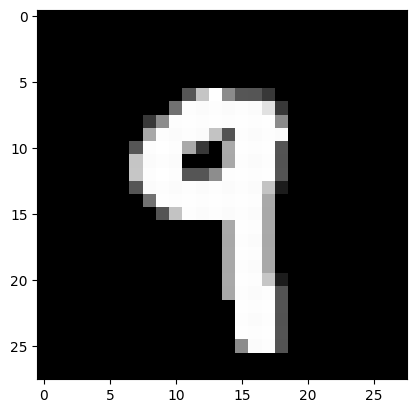

In [ ]:
index = 18
img = np.reshape(x_test_orig[index],(28,28))
plt.imshow(img, cmap='gray')
plt.show()

**Clearly we could say that this as 9.**

**One hot encoding:**

In [ ]:
y_train = tf.cast(y_train,dtype=tf.int64)
print(y_train[15])

tf.Tensor([0 1 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


In [ ]:
import tensorflow.keras.layers as tfl

In [ ]:
model = tf.keras.Sequential()
model.add(tfl.Input(shape=(784,)))
model.add(tfl.Dense(120,activation='relu'))
model.add(tfl.Dense(84,activation='relu'))
model.add(tfl.Dense(10,activation='softmax'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Let's see the Neural network architecture here below

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               94200     
                                                                 
 dense_1 (Dense)             (None, 84)                10164     
                                                                 
 dense_2 (Dense)             (None, 10)                850       
                                                                 
Total params: 105,214
Trainable params: 105,214
Non-trainable params: 0
_________________________________________________________________


Data loading into train and test sets.
Now let's see the dimensions of data.

In [ ]:
print(train.shape)
print("x_train shape: "+str(x_train.shape)) # this shows 40k test cases
print("y_train shape: "+str(y_train.shape))
# print("x_cv shape: "+str(x_cv.shape))
# print("y_cv shape: "+str(y_cv.shape))
print("x_test shape: "+str(x_test.shape)) # this shows 28K test cases

(42000, 785)
x_train shape: (42000, 784)
y_train shape: (42000, 10)
x_test shape: (28576, 784)


Now let's train the model and then evaluate it

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
2625/2625 [==============================] - 9s 3ms/step - loss: 0.0519 - accuracy: 0.9203
Epoch 2/10
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0215 - accuracy: 0.9664
Epoch 3/10
2625/2625 [==============================] - 5s 2ms/step - loss: 0.0148 - accuracy: 0.9772
Epoch 4/10
2625/2625 [==============================] - 4s 2ms/step - loss: 0.0110 - accuracy: 0.9832
Epoch 5/10
2625/2625 [==============================] - 5s 2ms/step - loss: 0.0085 - accuracy: 0.9872
Epoch 6/10
2625/2625 [==============================] - 4s 2ms/step - loss: 0.0070 - accuracy: 0.9900
Epoch 7/10
2625/2625 [==============================] - 4s 2ms/step - loss: 0.0052 - accuracy: 0.9924
Epoch 8/10
2625/2625 [==============================] - 5s 2ms/step - loss: 0.0048 - accuracy: 0.9931
Epoch 9/10
2625/2625 [==============================] - 4s 2ms/step - loss: 0.0036 - accuracy: 0.9951
Epoch 10/10
2625/2625 [==============================] - 5s 2ms/step - loss: 0.003

Using Adam optimizer(Rms prop. + momentum) is the best rather than stochastic gradient descent-SGD optimizer. It gives about 99.9% train accuracy , but with SGD optimizer we get 91% which can be obtained by adam in first epoch itself.

In [ ]:
y_pred_softmax = model.predict(x_test)
print(y_pred_softmax.shape)

893/893 [==============================] - 1s 927us/step
(28576, 10)


In [ ]:
y_pred = tf.argmax(y_pred_softmax,axis=1)

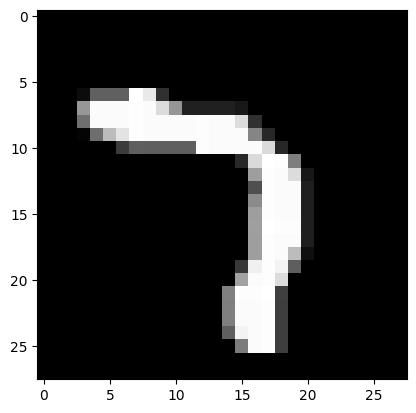

tf.Tensor(7, shape=(), dtype=int64)


In [ ]:
index = 45
img = np.reshape(x_test_orig[index],(28,28))
plt.imshow(img, cmap='gray')
plt.show()
print(y_pred[index])

In [ ]:
y_test = y_pred.numpy()
output = pd.DataFrame(y_test)
output.to_csv('epoch20.csv',index=False)

In [ ]:
model.evaluate(x_train,y_train)

1313/1313 [==============================] - 2s 2ms/step - loss: 0.0017 - accuracy: 0.9981


[0.0016721937572583556, 0.9980714321136475]

In [ ]:
mnist_data = pd.read_csv('/content/sample_data/mnist_test.csv')
test = mnist_data.values
x_mnist_orig = test[:,1:]
x_mnist = x_mnist_orig/255.0
y_mnist_orig = test[:,0]
y_mnist = tf.one_hot(y_mnist_orig,depth=10)

Now let's see the accuracy of the mnist test data set (10,000 examples).

In [ ]:
model.evaluate(x_mnist,y_mnist)

313/313 [==============================] - 0s 997us/step - loss: 0.0083 - accuracy: 0.9890


[0.00830751471221447, 0.9889988899230957]

Surprisingly!, the model gives 99.18% accuracy with the mnist test set.

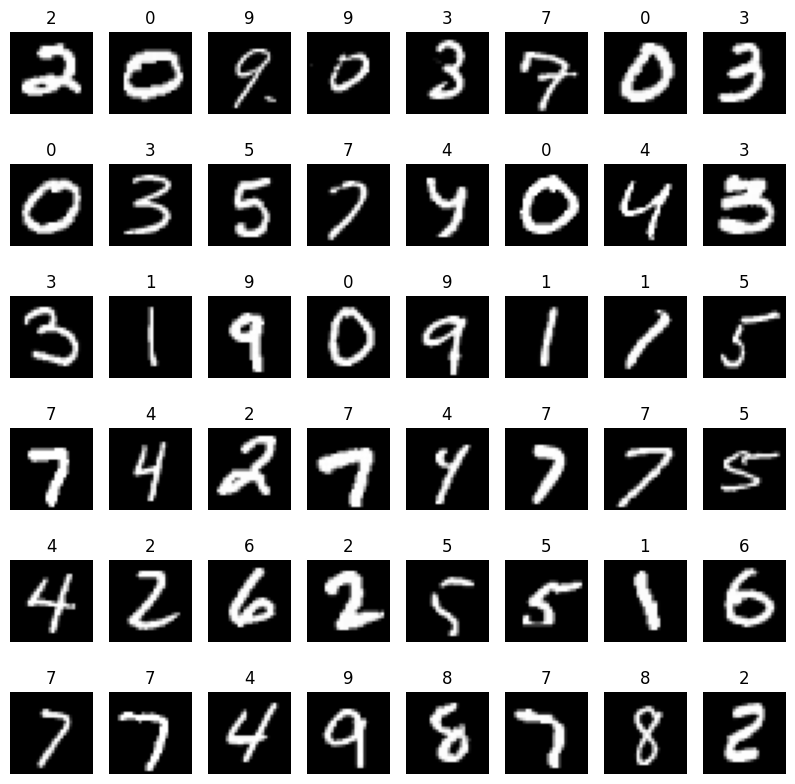

In [ ]:
images_iter = iter(x_test)
labels_iter = iter(y_pred)
plt.figure(figsize=(10, 10))
for i in range(48):
    ax = plt.subplot(6, 8, i + 1)
    img = np.reshape(x_test_orig[i],(28,28)) #reshaping the image to (28,28)
    plt.imshow(img, cmap='gray')
    plt.title(int(y_pred[i]))
    plt.axis("off")

We could only see one error in 1st row 4th column, that should be 0 but predicted as '9' apparently.